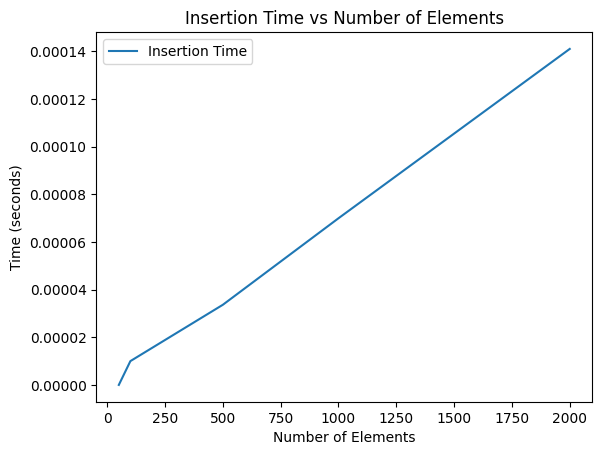

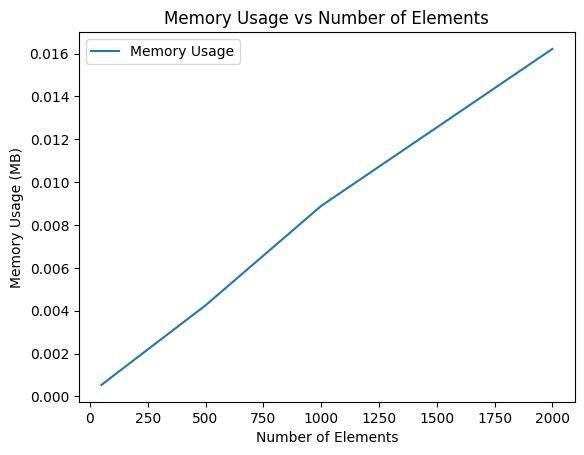

In [1]:
import time
import tracemalloc
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        if self.root is None:
            self.root = TreeNode(value)
        else:
            self._insert_recursively(self.root, value)

    def _insert_recursively(self, node, value):
        if value < node.value:
            if node.left is None:
                node.left = TreeNode(value)
            else:
                self._insert_recursively(node.left, value)
        elif value > node.value:
            if node.right is None:
                node.right = TreeNode(value)
            else:
                self._insert_recursively(node.right, value)

# Функція для вимірювання часу і пам'яті
def measure_performance(tree, elements):
    insertion_times = []
    memory_usage = []
    for element in elements:
        start_time = time.time()
        tracemalloc.start()
        
        tree.insert(element)
        
        end_time = time.time()
        insertion_times.append(end_time - start_time)
        
        current, peak = tracemalloc.get_traced_memory()
        memory_usage.append(peak / 10**6)  # Convert bytes to megabytes
        tracemalloc.stop()
    return insertion_times, memory_usage

# Приклад використання:
sizes = [50, 100, 500, 1000, 2000]
insertion_times_all = []
memory_usage_all = []

for size in sizes:
    bst = BinarySearchTree()
    elements = list(range(1, size + 1))
    insertion_times, memory_usage = measure_performance(bst, elements)
    insertion_times_all.append(sum(insertion_times) / size)  # Середній час вставки
    memory_usage_all.append(max(memory_usage))  # Максимальне використання пам'яті

# Побудова графіків
plt.plot(sizes, insertion_times_all, label='Insertion Time')
plt.xlabel('Number of Elements')
plt.ylabel('Time (seconds)')
plt.title('Insertion Time vs Number of Elements')
plt.legend()
plt.show()

plt.plot(sizes, memory_usage_all, label='Memory Usage')
plt.xlabel('Number of Elements')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage vs Number of Elements')
plt.legend()
plt.show()
